## Project Intro: Intel Lab Data

This notebook contains information about data collected from 54 sensors deployed in the Intel Berkeley Research lab between February 28th and April 5th, 2004.

`Mica2Dot` sensors with weather boards collected timestamped topology information, along with humidity, temperature, light and voltage values once every 31 seconds.

Source: http://db.csail.mit.edu/labdata/labdata.html

## Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### Dataset #1: Sensor Data

In [3]:
sensor_data = pd.read_csv('data/data.txt', sep=" ", header=None)
sensor_data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [4]:
sensor_data.columns = ['date', 'time', 'epoch', 'mote_id', 
                       'temperature', 'humidity', 'light', 'voltage']
sensor_data.head()

,date,time,epoch,mote_id,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [5]:
sensor_data['datetime'] = sensor_data['date'] + ' ' + sensor_data['time']
sensor_data['datetime'] = pd.to_datetime(sensor_data['datetime'])
sensor_data['datetime'] = sensor_data['datetime'].values.astype('<M8[h]')
sensor_data.head(10)

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397,2004-03-31 03:00:00
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964,2004-02-28 00:00:00
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742,2004-02-28 01:00:00
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:00:00
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964,2004-02-28 01:00:00
5,2004-02-28,01:08:45.992524,22,1.0,19.1456,38.94010,45.08,2.68742,2004-02-28 01:00:00
6,2004-02-28,01:09:22.323858,23,1.0,19.1652,38.87200,45.08,2.68742,2004-02-28 01:00:00
7,2004-02-28,01:09:46.109598,24,1.0,19.1652,38.80390,45.08,2.68742,2004-02-28 01:00:00
8,2004-02-28,01:10:16.6789,25,1.0,19.1456,38.83790,45.08,2.69964,2004-02-28 01:00:00
9,2004-02-28,01:10:46.250524,26,1.0,19.1456,38.87200,45.08,2.68742,2004-02-28 01:00:00


In [6]:
sensor_data.sort_values(by=['mote_id', 'datetime'], inplace=True)
sensor_data.tail()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
2313212,2004-04-03,16:00:41.408433,178,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313213,2004-04-03,16:03:41.027159,179,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313214,2004-04-03,16:24:41.364247,186,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313215,2004-04-03,16:33:40.80513,188,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00
2313216,2004-04-03,16:36:40.458726,189,NaN,NaN,NaN,NaN,NaN,2004-04-03 16:00:00


In [7]:
sensor_data.isna().sum()

date               0
time               0
epoch              0
mote_id          526
temperature      901
humidity         902
light          93878
voltage          526
datetime           0
dtype: int64

In [8]:
sensor_data.dropna(inplace=True)
sensor_data.isna().sum()

date           0
time           0
epoch          0
mote_id        0
temperature    0
humidity       0
light          0
voltage        0
datetime       0
dtype: int64

In [9]:
sensor_data.drop_duplicates('datetime', inplace=True)
sensor_data.tail()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
2308804,2004-04-04,01:41:52.80531,1605,58.0,22.0366,34.5012,3.22,2.61639,2004-04-04 01:00:00
2308806,2004-04-04,07:14:56.864183,1607,58.0,21.0664,35.6110,5.06,2.59354,2004-04-04 07:00:00
2308808,2004-04-04,11:48:02.390186,1609,58.0,21.5956,35.8530,48.76,2.58226,2004-04-04 11:00:00
2308810,2004-04-04,16:21:06.290436,1611,58.0,23.9378,34.6403,86.48,2.59354,2004-04-04 16:00:00
2308812,2004-04-04,20:54:11.616528,1613,58.0,21.6348,37.1963,3.22,2.56000,2004-04-04 20:00:00


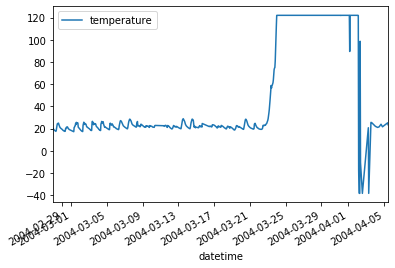

In [10]:
sensor_data.plot(x='datetime', y='temperature')

In [38]:
mote1 = sensor_data[sensor_data['mote_id'] == 1.0 ]
mote1 = mote1[:500]
mote1.head()

,date,time,epoch,mote_id,temperature,humidity,light,voltage,datetime
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.0933,45.08,2.69964,2004-02-28 00:00:00
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.4629,45.08,2.68742,2004-02-28 01:00:00
54,2004-02-28,02:01:46.132962,128,1.0,18.8712,38.9742,43.24,2.69964,2004-02-28 02:00:00
87,2004-02-28,03:02:17.064743,249,1.0,18.5478,38.9401,43.24,2.67532,2004-02-28 03:00:00
128,2004-02-28,04:00:16.541715,365,1.0,18.2734,39.0422,43.24,2.68742,2004-02-28 04:00:00


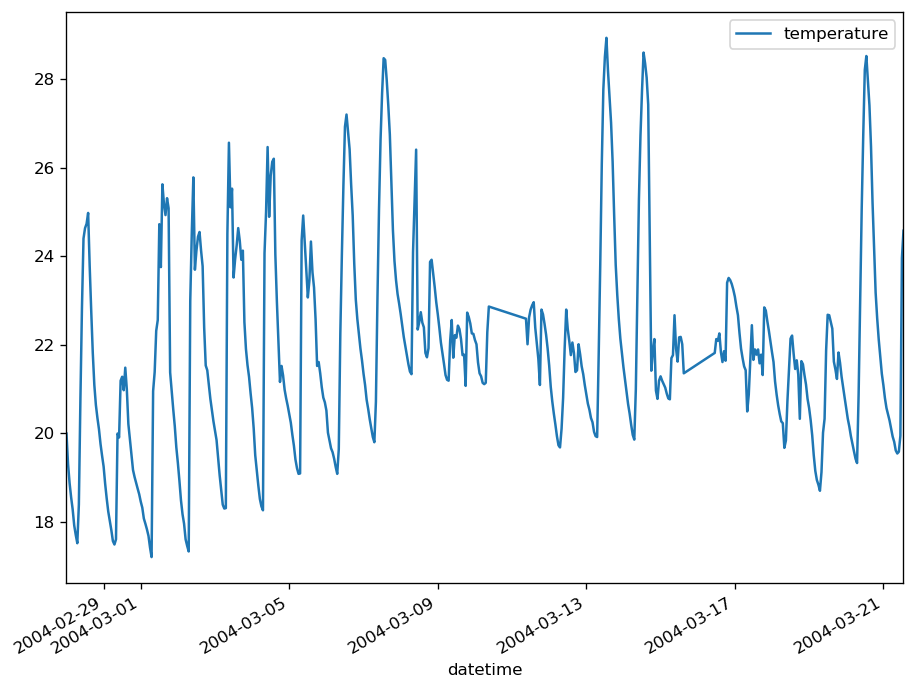

In [39]:
mote1.plot(x='datetime', y='temperature')

In [40]:
mote1.shape

(500, 9)

### Time series prediction with ARIMA
source: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [41]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(mote1['temperature'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.355110
p-value: 0.012588


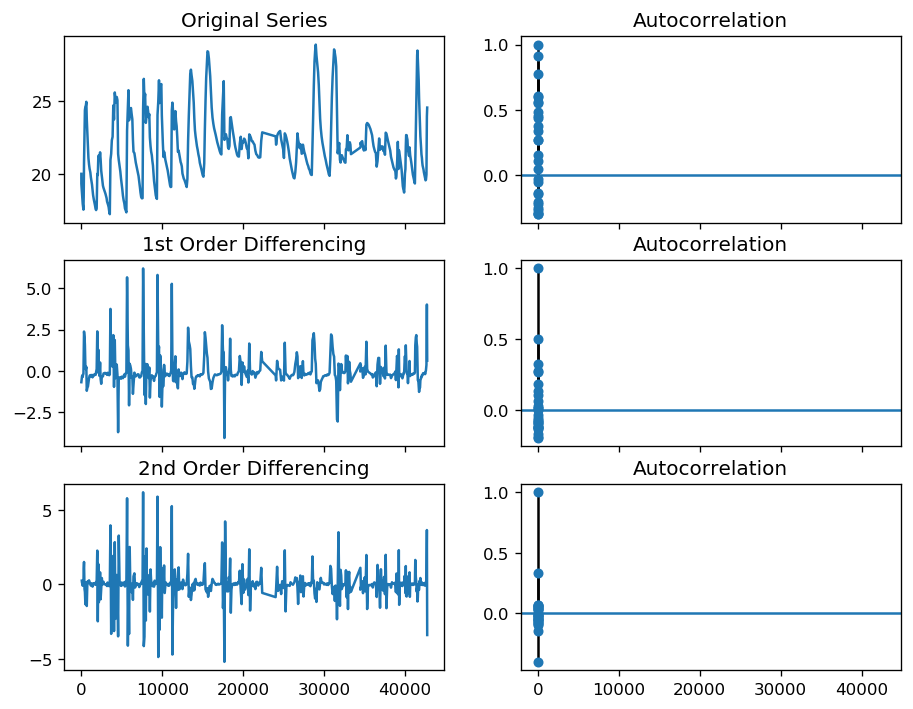

In [42]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(mote1.temperature); axes[0, 0].set_title('Original Series')
plot_acf(mote1.temperature, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(mote1.temperature.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(mote1.temperature.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(mote1.temperature.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(mote1.temperature.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [55]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(mote1.temperature, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.temperature   No. Observations:                  499
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -655.289
Method:                       css-mle   S.D. of innovations              0.900
Date:                Sun, 29 Dec 2019   AIC                           1320.577
Time:                        11:23:27   BIC                           1341.640
Sample:                             1   HQIC                          1328.843
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0094      0.060      0.156      0.876      -0.109       0.128
ar.L1.D.temperature    -0.0227      0.259     -0.088      0.930      -0.530       0.485
ma.L1.D.temperat

/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


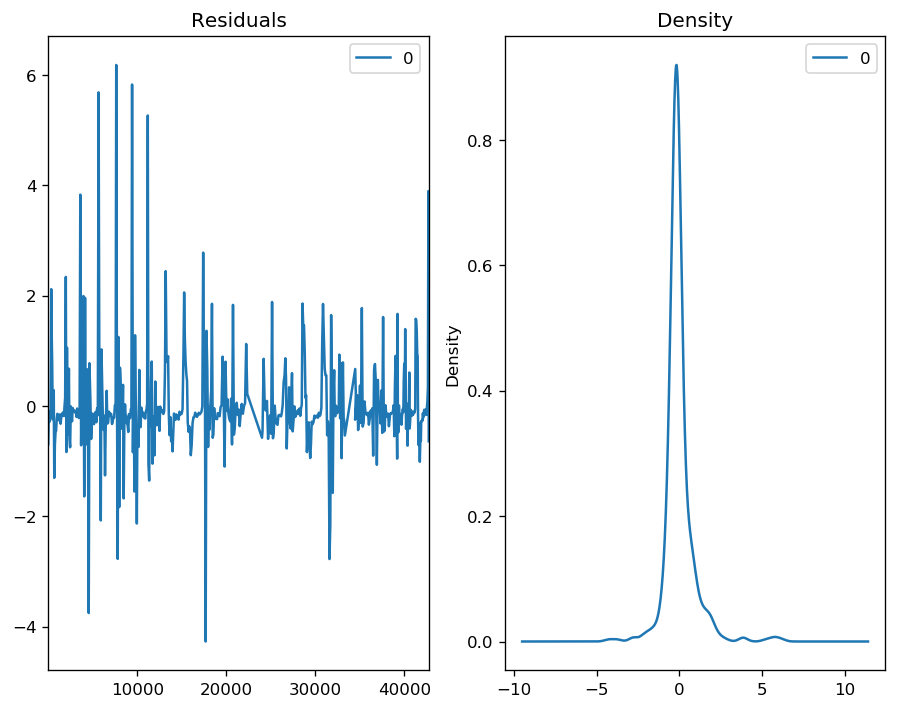

In [56]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

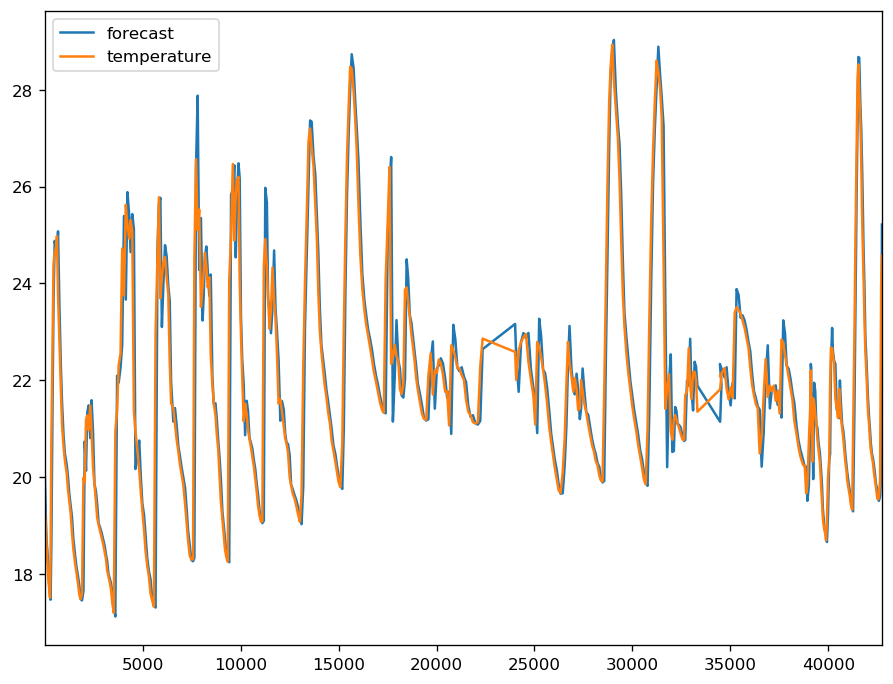

In [57]:
model_fit.plot_predict(dynamic=False)
plt.show()

/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rhoesada/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


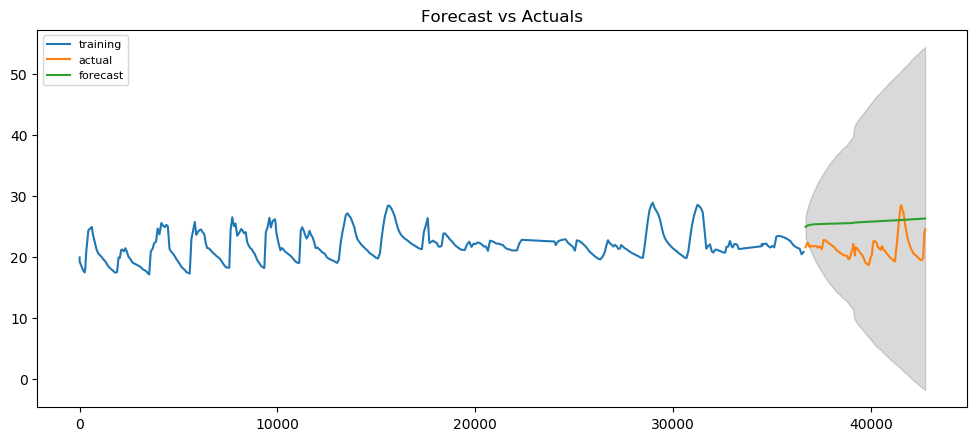

In [63]:
train = mote1.temperature[:400]
test = mote1.temperature[400:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(mote1.temperature, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### pmdarima

In [46]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(mote1.temperature, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1314.033, BIC=1330.891, Fit time=0.178 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=2273.704, BIC=2282.134, Fit time=0.012 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=1363.311, BIC=1375.955, Fit time=0.110 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1814.410, BIC=1827.054, Fit time=0.071 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=4512.217, BIC=4516.432, Fit time=0.009 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1264.226, BIC=1285.299, Fit time=0.462 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=1286.869, BIC=1303.728, Fit time=0.089 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=1265.463, BIC=1290.751, Fit time=0.814 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 0); AIC=1265.640, BIC=1290.927, Fit time=0.573 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_o

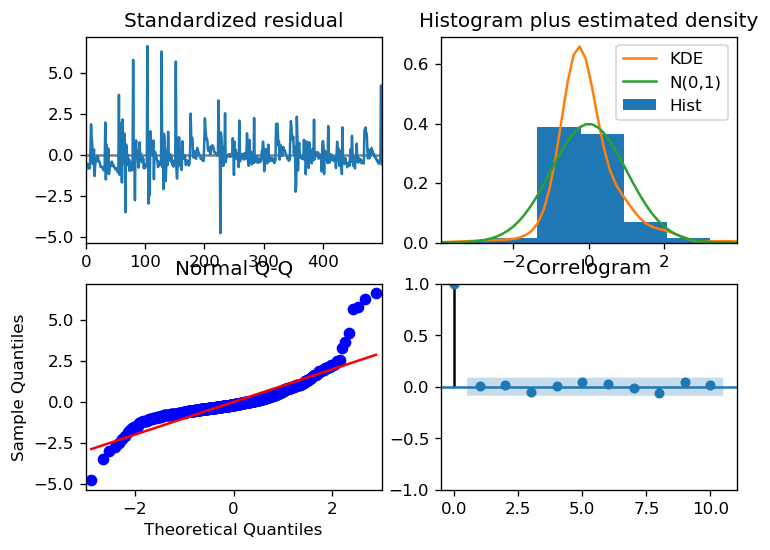

In [47]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

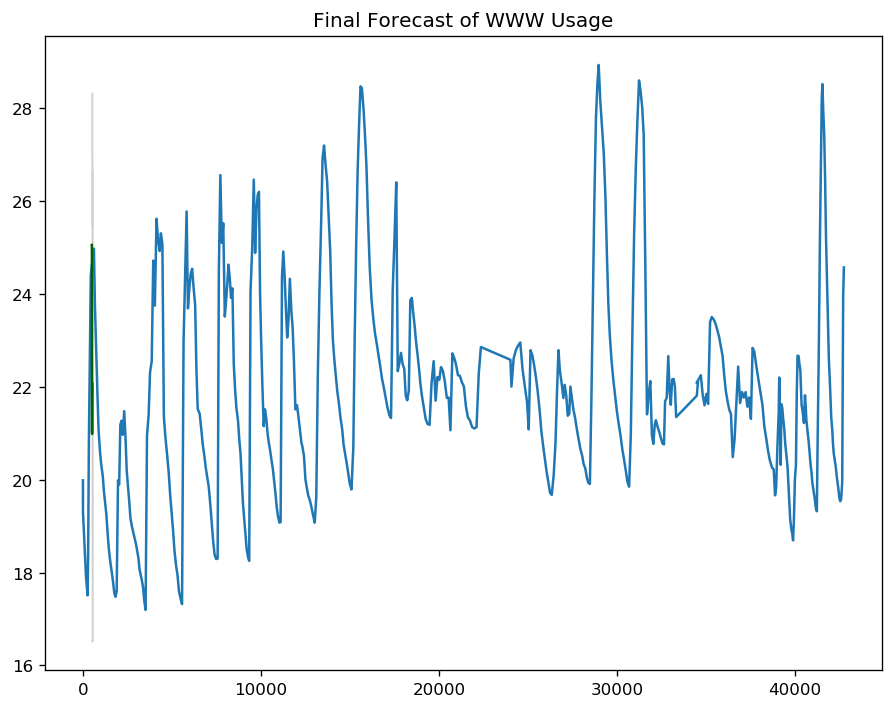

In [52]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(mote1.temperature), len(mote1.temperature)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(mote1.temperature)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [37]:
len(mote1.temperature)

500

In [54]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(mote1.temperature, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1283.341, BIC=1304.293, Fit time=0.725 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2684.414, BIC=2692.795, Fit time=0.032 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1258.967, BIC=1275.728, Fit time=0.664 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1795.733, BIC=1812.494, Fit time=0.703 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2682.442, BIC=2686.632, Fit time=0.029 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1712.229, BIC=1724.800, Fit time=0.138 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=1252.501, BIC=1273.453, Fit time=2.526 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=1203.608, BIC=1228.750, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  500
Model:             SARIMAX(3, 0, 0)x(2, 1, 2, 12)   Log Likelihood                -568.940
Date:                            Sun, 29 Dec 2019   AIC                           1155.880
Time:                                    11:21:12   BIC                           1193.593
Sample:                                         0   HQIC                          1170.694
                                            - 500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0061      0.009      0.700      0.484      -0.011       0.023
ar.L1          1.0661      0.037     29.197      0.000       0.995       1.138
ar.L2          0.0088      0.051      0.173      0.863      -0.091       0.109
ar.L3         -0.2196      0.037     -5.997      0.000      -0.291      -0.148
ar.S.L12      -0.5413      0.088     -6.150      0.000      -0.714      -0.369
ar.S.L24       0.2385      0.074      3.209      0.001       0.093       0.384
ma.S.L12      -0.4290      0.094     -4.552      0.000      -0.614      -0.244
ma.S.L24      -0.3999      0.084     -4.760      0.000      -0.565      -0.235
sigma2         0.5757      0.026     22.506      0.000       0.526       0.626
===================================================================================
Ljung-Box (Q):                       39.37   Jarque-Bera (JB):               640.32
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""